In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def get_dataset():
    clear = open('clear.csv', 'r')
    clear_rows = clear.readlines()
    clear.close()
    
    smog = open('smog.csv', 'r')
    smog_rows = smog.readlines()
    smog.close()
    
    
    examples = len(clear_rows)
#     print(examples)
#     clear_datasets = np.zeros([examples, 300001])
    clear_datasets = []
    smog_datasets = []
    for i in range(examples):
        single_row = clear_rows[i]
        single_row = single_row.split(',')

        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(1)
        clear_datasets.append(np.hstack([label, single_row]))
    
    for i in range(examples):
        single_row = smog_rows[i]
        single_row = single_row.split(',')
        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(0)
        smog_datasets.append(np.hstack([label, single_row]))
        
    return clear_datasets + smog_datasets

In [3]:
datasets = get_dataset()

In [4]:
print(len(datasets))

9148


In [5]:
example = np.array(datasets)
np.random.shuffle(example)
examples = len(example)
# print(examples)
labels = np.array([example[i][0] for i in range(examples)])
images = np.array([example[i][1:].reshape(100, 100, 3) / 255 for i in range(examples)])



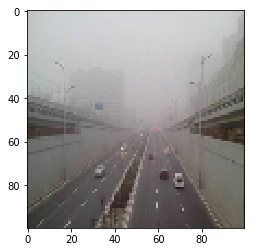

In [6]:
# example = example[6000]
# print(example)
# example = example[1:].reshape(100, 100, 3)
# # example = example.reshape(100, 100, 3)
# # print(example)
plt.imshow(images[501])
plt.show()

In [7]:
# import pickle


# outfile = open('datasets.pkf', 'wb')
# pickle.dump(example, outfile)
# outfile.close()

In [8]:
print(labels.shape, images.shape)

(9148,) (9148, 100, 100, 3)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3) 
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


In [10]:
#VGG
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100, 100, 3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        36928     
__________

In [11]:
#Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split = 0.1)

Train on 5762 samples, validate on 641 samples
Epoch 1/10
5762/5762 [==============================] - 716s 124ms/step - loss: 0.6408 - acc: 0.6218 - val_loss: 0.6909 - val_acc: 0.5460
Epoch 2/10
 640/5762 [==>...........................] - ETA: 9:23 - loss: 0.7117 - acc: 0.5062

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)